In [33]:
from Other_To_nparray import generate_data, traintest_split
from keras.models import load_model
from model_evalution import evalution_metrics
from Model.PC_6_model import t_m
from sklearn.model_selection import train_test_split
import os

In [116]:
train_data, train_labels = generate_data('Train_Postive_3175.fasta', 'Train_Negative_3175.fasta', method='PC_6')
train_data,val_data, train_label, val_labels = train_test_split(train_data, train_labels,test_size=0.1,random_state=10, stratify=train_labels)
test_data, test_labels = generate_data('Test_Postive_353.fasta', 'Test_Negative_353.fasta', method='PC_6')



In [38]:
all_data, all_labels = generate_data(pos_fasta='4DB_independent_6623.fasta', neg_fasta='Train_Negative_6623.fasta', method='PC_6')

In [39]:
model = load_model('Output/PC_6_final/Model/PC6_final_8.h5')

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [41]:
labels_score = model.predict(val_data)

In [42]:
auc = roc_auc_score(val_labels, labels_score)

In [43]:
auc

0.9700513858302086

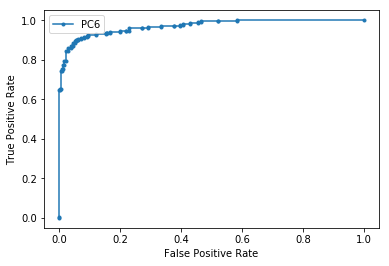

In [49]:
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(val_labels, labels_score)
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='PC6')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [64]:
# Geometric Mean 
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.409106, G-Mean=0.923


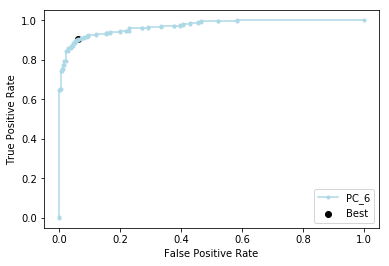

<Figure size 720x720 with 0 Axes>

In [91]:
pyplot.plot(fpr, tpr, marker='.', label='PC_6', color='lightblue')
pyplot.scatter(fpr[ix], tpr[ix],c='black',marker='o',alpha=1, label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.figure(figsize=(10,10))
# show the plot
pyplot.show()

In [92]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(val_labels, labels_score)

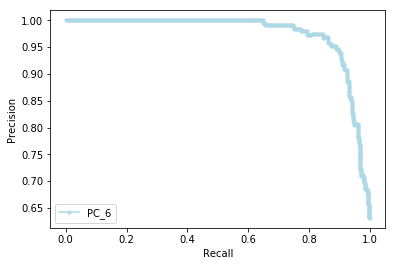

In [94]:
pyplot.plot(recall, precision, marker='.', label='PC_6', color='lightblue')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [96]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.409106, F-Score=0.922


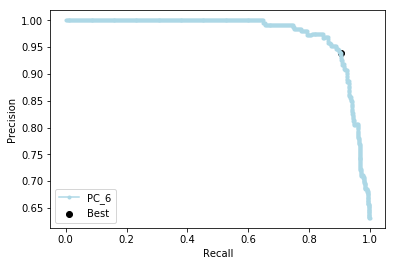

In [98]:
pyplot.plot(recall, precision, marker='.', label='PC_6', color='lightblue')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [110]:
preds = model.predict(val_data)


In [117]:
class_one = preds > 0.5
true_labels = val_labels >0.5

In [131]:
np.mean(class_one.reshape(635,) == true_labels)

0.9133858267716536

In [132]:
class_one = preds > 0.409106
true_labels = val_labels >0.409106

In [133]:
np.mean(class_one.reshape(635,) == true_labels)

0.9228346456692913

In [134]:
preds = model.predict(test_data)

In [135]:
class_one = preds > 0.5
true_labels = test_labels >0.5

In [137]:
np.mean(class_one.reshape(706,) == true_labels)

0.9065155807365439

In [140]:
class_one = preds > 0.409106
true_labels = test_labels >0.409106

In [141]:
np.mean(class_one.reshape(706,) == true_labels)

0.9050991501416431

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_label, labels_score.round())